First, the necessary libraries for the research are imported. The research proceeds with future warnings and data preparation. The relevant features are selected and transform categorical variables using one-hot encoding. Standard scaling is applied to ensure all features have the same scale, which is important for models like Logistic Regression. For robust evaluation, the research employed K-Fold cross-validation with 5 folds. This technique helps in obtaining a better estimate of the model's performance. The Logistic Regression is determined as base model and use Bagging Classifier with 50 base models to create an ensemble.
The performance efficiency is obtained during cross-validation. The Bagging Classifier trains and tests the ensemble on different folds of the data. It calculates and prints the cross-validation accuracies and area under the ROC curve (AUC) scores. These metrics provide insights into the model's performance across different splits of the data. Interpreting the results, research focus on the mean accuracy and mean AUC. Mean accuracy gives us an idea of the model's overall performance, while mean AUC measures its ability to distinguish between classes. Higher values indicate better performance.
Ensemble learning, particularly Bagging, offers several advantages, including increased stability, reduced overfitting, and improved generalization. Ensemble learning is a powerful technique that can significantly boost the performance of machine learning models. The Bagging Classifier is a versatile tool for building ensembles and enhancing predictive accuracy. By combining the strengths of multiple models, research can achieve better results and more reliable predictions.


In [4]:
import pandas as pd
import requests

In [3]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


df1 = pd.read_csv(io.BytesIO(uploaded[fn]))

df1

Saving suicide-rate-by-country-2023.csv to suicide-rate-by-country-2023.csv
User uploaded file "suicide-rate-by-country-2023.csv" with length 4262 bytes


,country,rate2019both,rate2019male,rate2019female
0,Antigua and Barbuda,0.4,0.0,0.8
1,Barbados,0.6,0.9,0.3
2,Grenada,0.7,0.6,0.7
3,Saint Vincent and the Grenadines,1.0,1.3,0.6
4,Sao Tome and Principe,1.5,2.2,0.8
...,...,...,...,...
174,Kiribati,28.3,48.6,8.7
175,South Korea,28.6,40.2,16.9
176,Eswatini,29.4,55.1,4.7
177,Guyana,40.3,63.0,17.4


In [5]:
df1.columns

Index(['country', 'rate2019both', 'rate2019male', 'rate2019female'], dtype='object')

In [6]:
df1 = df1.drop("rate2019male", axis='columns')

In [7]:
df1 = df1.drop("rate2019female", axis='columns')

In [8]:
df1.columns = ['Country', 'Suicidal Rate']

In [9]:
df1.head(50)

,Country,Suicidal Rate
0,Antigua and Barbuda,0.4
1,Barbados,0.6
2,Grenada,0.7
3,Saint Vincent and the Grenadines,1.0
4,Sao Tome and Principe,1.5
5,Jordan,1.6
6,Venezuela,2.1
7,Honduras,2.1
8,Philippines,2.2
9,Indonesia,2.4


In [10]:
url = 'https://tcktcktck.org/countries'

res = requests.get(url)

dfs = pd.read_html(res.text)

df = dfs[0]

df2 = df[['Country', 'Avg °C']]

In [11]:
df2

,Country,Avg °C
0,Afghanistan,15.70
1,Albania,15.17
2,Algeria,20.00
3,American Samoa,28.00
4,Andorra,7.17
...,...,...
241,Wallis and Futuna,28.13
242,Western Sahara,26.74
243,Yemen,25.53
244,Zambia,23.33


In [12]:
df2.columns

Index(['Country', 'Avg °C'], dtype='object')

In [13]:
df2.columns = ['Country', 'Avg Temp(C)']

In [14]:
df2.head(50)

,Country,Avg Temp(C)
0,Afghanistan,15.70
1,Albania,15.17
2,Algeria,20.00
3,American Samoa,28.00
4,Andorra,7.17
5,Angola,24.37
6,Anguilla,21.68
7,Antigua and Barbuda,27.14
8,Argentina,18.24
9,Armenia,10.40


In [15]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

maindf = pd.read_excel(io.BytesIO(uploaded[fn]))
maindf


Saving new billionare dataset.xlsx to new billionare dataset.xlsx
User uploaded file "new billionare dataset.xlsx" with length 331313 bytes


,Rank,Name,Net Worth,Change,Age,Source,Country
0,1,Elon Musk,$240.5 B,▶ $6.8 B | 2.91%,52.0,"Tesla, SpaceX",United States
1,2,Bernard Arnault & family,$228.0 B,▶ $401 M | 0.18%,74.0,LVMH,France
2,3,Jeff Bezos,$155.0 B,▶ $4.1 B | 2.71%,59.0,Amazon,United States
3,4,Larry Ellison,$146.5 B,▶ $470 M | 0.32%,78.0,Oracle,United States
4,5,Bill Gates,$119.5 B,▶ $885 M | 0.75%,67.0,Microsoft,United States
...,...,...,...,...,...,...,...
2640,2641,Hong Seok-joh,$1.0 B,▶ $4 M | -0.39%,NaN,"music, sneakers",South Korea
2641,2642,Gim Seong-gon,$1.0 B,▶ $20 M | -1.97%,NaN,cryptocurrency exchange,South Korea
2642,2643,Kanye West,$0.4 B,$0,NaN,blood testing,United States
2643,2644,Sam Bankman-Fried,$0.0 B,▶ $0M | 0.00%,NaN,NaN,United States


In [16]:
maindf.columns

Index(['Rank', 'Name', 'Net Worth', 'Change', 'Age', 'Source', 'Country'], dtype='object')

In [17]:
maindf = maindf.drop("Change", axis='columns')

In [18]:
maindf

,Rank,Name,Net Worth,Age,Source,Country
0,1,Elon Musk,$240.5 B,52.0,"Tesla, SpaceX",United States
1,2,Bernard Arnault & family,$228.0 B,74.0,LVMH,France
2,3,Jeff Bezos,$155.0 B,59.0,Amazon,United States
3,4,Larry Ellison,$146.5 B,78.0,Oracle,United States
4,5,Bill Gates,$119.5 B,67.0,Microsoft,United States
...,...,...,...,...,...,...
2640,2641,Hong Seok-joh,$1.0 B,NaN,"music, sneakers",South Korea
2641,2642,Gim Seong-gon,$1.0 B,NaN,cryptocurrency exchange,South Korea
2642,2643,Kanye West,$0.4 B,NaN,blood testing,United States
2643,2644,Sam Bankman-Fried,$0.0 B,NaN,NaN,United States


In [19]:
maindf = maindf.dropna()
maindf

,Rank,Name,Net Worth,Age,Source,Country
0,1,Elon Musk,$240.5 B,52.0,"Tesla, SpaceX",United States
1,2,Bernard Arnault & family,$228.0 B,74.0,LVMH,France
2,3,Jeff Bezos,$155.0 B,59.0,Amazon,United States
3,4,Larry Ellison,$146.5 B,78.0,Oracle,United States
4,5,Bill Gates,$119.5 B,67.0,Microsoft,United States
...,...,...,...,...,...,...
2564,2565,Ma Xiuhui,$1.1 B,70.0,LED lighting,China
2565,2566,Zhou Wen & family,$1.0 B,69.0,Chemicals,China
2566,2567,Wu Yonghua,$1.0 B,46.0,Apparel,China
2567,2568,Danilo Iervolino,$1.0 B,31.0,Online universities,Italy


In [20]:
merged_df = maindf.merge(df1, on='Country', how='left').merge(df2, on='Country', how='left')


In [21]:
import re

merged_df['Name'] = merged_df['Name'].str.replace('& family', '', flags=re.IGNORECASE, regex=True)


In [22]:
merged_df.head(20)

,Rank,Name,Net Worth,Age,Source,Country,Suicidal Rate,Avg Temp(C)
0,1,Elon Musk,$240.5 B,52.0,"Tesla, SpaceX",United States,16.1,12.64
1,2,Bernard Arnault,$228.0 B,74.0,LVMH,France,13.8,12.44
2,3,Jeff Bezos,$155.0 B,59.0,Amazon,United States,16.1,12.64
3,4,Larry Ellison,$146.5 B,78.0,Oracle,United States,16.1,12.64
4,5,Bill Gates,$119.5 B,67.0,Microsoft,United States,16.1,12.64
5,6,Warren Buffett,$117.5 B,92.0,Berkshire Hathaway,United States,16.1,12.64
6,7,Mark Zuckerberg,$115.0 B,39.0,Facebook,United States,16.1,12.64
7,8,Larry Page,$112.7 B,50.0,Google,United States,16.1,12.64
8,9,Sergey Brin,$107.0 B,49.0,Google,United States,16.1,12.64
9,10,Steve Ballmer,$103.6 B,67.0,Microsoft,United States,16.1,12.64


In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import re

def get_zodiac(day, month):
    if (month == 1 and day >= 20) or (month == 2 and day <= 18):
        return "Aquarius"
    elif (month == 2 and day >= 19) or (month == 3 and day <= 20):
        return "Pisces"
    elif (month == 3 and day >= 21) or (month == 4 and day <= 19):
        return "Aries"
    elif (month == 4 and day >= 20) or (month == 5 and day <= 20):
        return "Taurus"
    elif (month == 5 and day >= 21) or (month == 6 and day <= 20):
        return "Gemini"
    elif (month == 6 and day >= 21) or (month == 7 and day <= 22):
        return "Cancer"
    elif (month == 7 and day >= 23) or (month == 8 and day <= 22):
        return "Leo"
    elif (month == 8 and day >= 23) or (month == 9 and day <= 22):
        return "Virgo"
    elif (month == 9 and day >= 23) or (month == 10 and day <= 22):
        return "Libra"
    elif (month == 10 and day >= 23) or (month == 11 and day <= 21):
        return "Scorpio"
    elif (month == 11 and day >= 22) or (month == 12 and day <= 21):
        return "Sagittarius"
    elif (month == 12 and day >= 22) or (month == 1 and day <= 19):
        return "Capricorn"

birthdate_list = []
zodiac_list = []

for name in merged_df['Name']:
    name = name.replace(' ', '_')
    url = f'https://en.wikipedia.org/wiki/{name}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    try:

        bday = soup.find('span', {'class': 'bday'})
        if bday:
            birth_date_str = bday.text
            birth_date = datetime.strptime(birth_date_str, '%Y-%m-%d')
            birthdate_list.append(birth_date)
            zodiac_list.append(get_zodiac(birth_date.day, birth_date.month))
        else:
            birthdate_list.append(None)
            zodiac_list.append(None)
    except:
        birthdate_list.append(None)
        zodiac_list.append(None)

merged_df['Birthdate'] = birthdate_list
merged_df['Zodiac'] = zodiac_list


Ensemble learning techniques have gained significant popularity due to their ability to enhance the performance of machine learning models. One such technique is Bagging, which stands for Bootstrap Aggregating. Bagging involves training multiple instances of the same base model on different subsets of the training data. The final predictions are then obtained by aggregating the predictions of these individual models. In this chapter, a practical example with Bagging Classifier from scikit-learn is used to improve the performance of a Logistic Regression model. The dataset used in this example contains features related to age, source, country, suicidal rate, average temperature, and zodiac signs. The research focus on predicting whether an individual is a billionaire based on these features.

In [24]:
merged_df

,Rank,Name,Net Worth,Age,Source,Country,Suicidal Rate,Avg Temp(C),Birthdate,Zodiac
0,1,Elon Musk,$240.5 B,52.0,"Tesla, SpaceX",United States,16.1,12.64,1971-06-28,Cancer
1,2,Bernard Arnault,$228.0 B,74.0,LVMH,France,13.8,12.44,1949-03-05,Pisces
2,3,Jeff Bezos,$155.0 B,59.0,Amazon,United States,16.1,12.64,1964-01-12,Capricorn
3,4,Larry Ellison,$146.5 B,78.0,Oracle,United States,16.1,12.64,1944-08-17,Leo
4,5,Bill Gates,$119.5 B,67.0,Microsoft,United States,16.1,12.64,1955-10-28,Scorpio
...,...,...,...,...,...,...,...,...,...,...
2564,2565,Ma Xiuhui,$1.1 B,70.0,LED lighting,China,8.1,14.62,NaT,None
2565,2566,Zhou Wen,$1.0 B,69.0,Chemicals,China,8.1,14.62,NaT,None
2566,2567,Wu Yonghua,$1.0 B,46.0,Apparel,China,8.1,14.62,NaT,None
2567,2568,Danilo Iervolino,$1.0 B,31.0,Online universities,Italy,6.7,14.47,NaT,None


In [25]:
merged_df = merged_df.dropna()


In [26]:
# Load the DataFrame
data = merged_df

data

,Rank,Name,Net Worth,Age,Source,Country,Suicidal Rate,Avg Temp(C),Birthdate,Zodiac
0,1,Elon Musk,$240.5 B,52.0,"Tesla, SpaceX",United States,16.1,12.64,1971-06-28,Cancer
1,2,Bernard Arnault,$228.0 B,74.0,LVMH,France,13.8,12.44,1949-03-05,Pisces
2,3,Jeff Bezos,$155.0 B,59.0,Amazon,United States,16.1,12.64,1964-01-12,Capricorn
3,4,Larry Ellison,$146.5 B,78.0,Oracle,United States,16.1,12.64,1944-08-17,Leo
4,5,Bill Gates,$119.5 B,67.0,Microsoft,United States,16.1,12.64,1955-10-28,Scorpio
...,...,...,...,...,...,...,...,...,...,...
2544,2545,Tiger Woods,$1.1 B,66.0,Golf,United States,16.1,12.64,1975-12-30,Capricorn
2546,2547,Said Gutseriev,$1.1 B,70.0,"Retail, investments",Russia,25.1,5.27,1988-04-18,Aries
2549,2550,Michael McCain,$1.1 B,66.0,packaged meats,Canada,11.8,2.09,1958-11-13,Scorpio
2556,2557,Chung Mong-joon,$1.1 B,60.0,"shipbuilding, industrial machines",South Korea,28.6,13.60,1951-11-15,Scorpio


In [27]:
# RQ1 & H1: Zodiac Sign and Wealth Accumulation

# Convert 'Net Worth' column to numeric after removing the '$' and 'B' characters
data['Net Worth'] = data['Net Worth'].str.replace('$', '').str.replace('B', '').astype(float)

# Group by Zodiac sign and calculate mean and median net worth
zodiac_networth = data.groupby('Zodiac')['Net Worth'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

zodiac_networth


<ipython-input-27-032abc3ca605>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Net Worth'] = data['Net Worth'].str.replace('$', '').str.replace('B', '').astype(float)
<ipython-input-27-032abc3ca605>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Net Worth'] = data['Net Worth'].str.replace('$', '').str.replace('B', '').astype(float)


,mean,median,count
Zodiac,,,
Aries,12.391045,3.30,67
Cancer,11.892188,3.90,64
Pisces,9.657143,3.20,70
Libra,9.252778,4.40,72
Scorpio,9.161017,4.00,59
Leo,8.278049,3.20,82
Aquarius,8.208333,2.90,72
Virgo,7.334177,3.60,79
Taurus,7.205479,3.40,73


In [28]:
import scipy.stats as stats

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(*[data['Net Worth'][data['Zodiac'] == zodiac] for zodiac in data['Zodiac'].unique()])

f_value, p_value


(0.9302939636508035, 0.510215404703634)

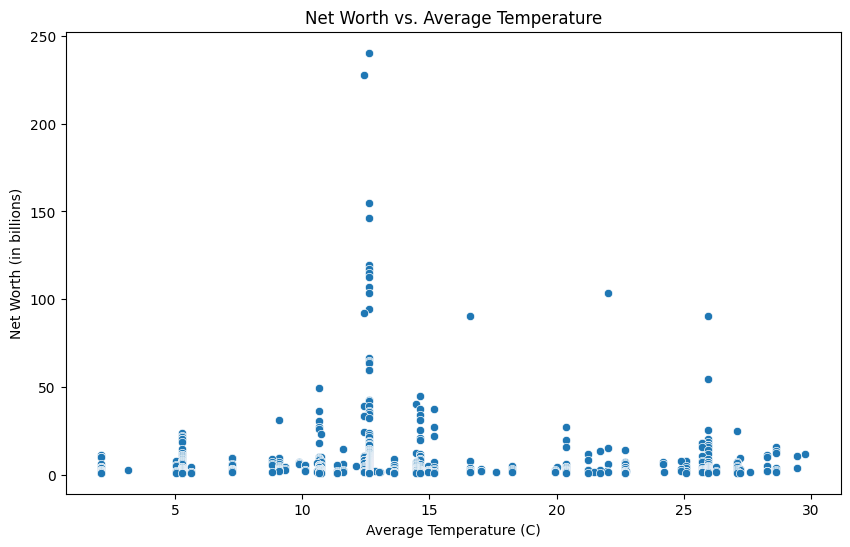

-0.006121442416222644

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# RQ2 & H2: Weather, Climate, and Wealth
# Scatter plot of 'Avg Temp(C)' versus 'Net Worth'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Avg Temp(C)', y='Net Worth')
plt.title('Net Worth vs. Average Temperature')
plt.xlabel('Average Temperature (C)')
plt.ylabel('Net Worth (in billions)')
plt.show()

# Calculate the correlation coefficient
correlation_temp_networth = data['Avg Temp(C)'].corr(data['Net Worth'])
correlation_temp_networth


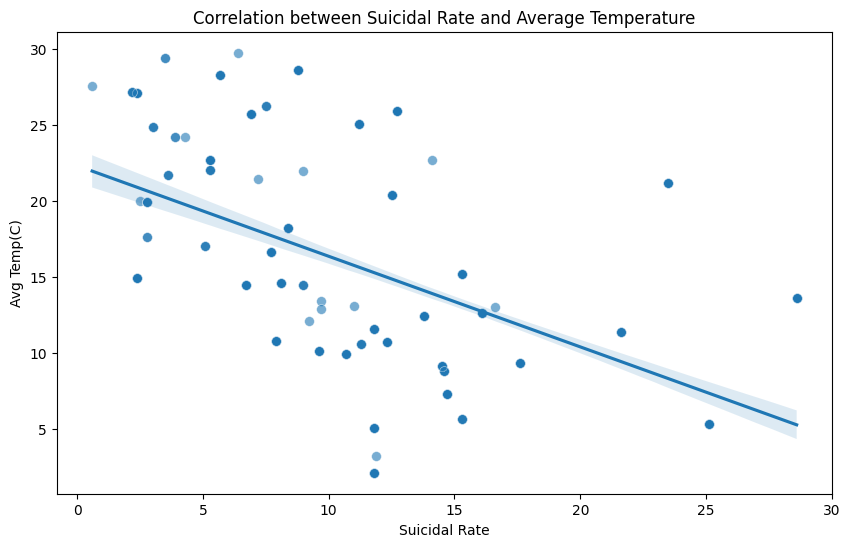

In [30]:
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Suicidal Rate', y='Avg Temp(C)', data=data, scatter_kws={'s':50, 'alpha':0.6, 'edgecolors':"w", 'linewidth':0.5})
plt.title('Correlation between Suicidal Rate and Average Temperature')
plt.show()


In [31]:
import numpy as np

In [32]:
def get_zodiac(date):
    if date >= datetime(date.year, 3, 21) and date <= datetime(date.year, 4, 19):
        return "Aries"
    elif date >= datetime(date.year, 4, 20) and date <= datetime(date.year, 5, 20):
        return "Taurus"
    elif date >= datetime(date.year, 5, 21) and date <= datetime(date.year, 6, 20):
        return "Gemini"
    elif date >= datetime(date.year, 6, 21) and date <= datetime(date.year, 7, 22):
        return "Cancer"
    elif date >= datetime(date.year, 7, 23) and date <= datetime(date.year, 8, 22):
        return "Leo"
    elif date >= datetime(date.year, 8, 23) and date <= datetime(date.year, 9, 22):
        return "Virgo"
    elif date >= datetime(date.year, 9, 23) and date <= datetime(date.year, 10, 22):
        return "Libra"
    elif date >= datetime(date.year, 10, 23) and date <= datetime(date.year, 11, 21):
        return "Scorpio"
    elif date >= datetime(date.year, 11, 22) and date <= datetime(date.year, 12, 21):
        return "Sagittarius"
    elif date >= datetime(date.year, 12, 22) or date <= datetime(date.year, 1, 19):
        return "Capricorn"
    elif date >= datetime(date.year, 1, 20) and date <= datetime(date.year, 2, 18):
        return "Aquarius"
    else:
        return "Pisces"

Cross-Validation Accuracies: [0.65269461 0.61676647 0.60479042 0.62462462 0.58858859]
Mean CV Accuracy: 0.6174929420438403
Cross-Validation AUCs: [0.70555256 0.63014165 0.66256983 0.67548389 0.63830443]
Mean CV AUC: 0.6624104747060746
Empty DataFrame
Columns: [Feature, Importance]
Index: []


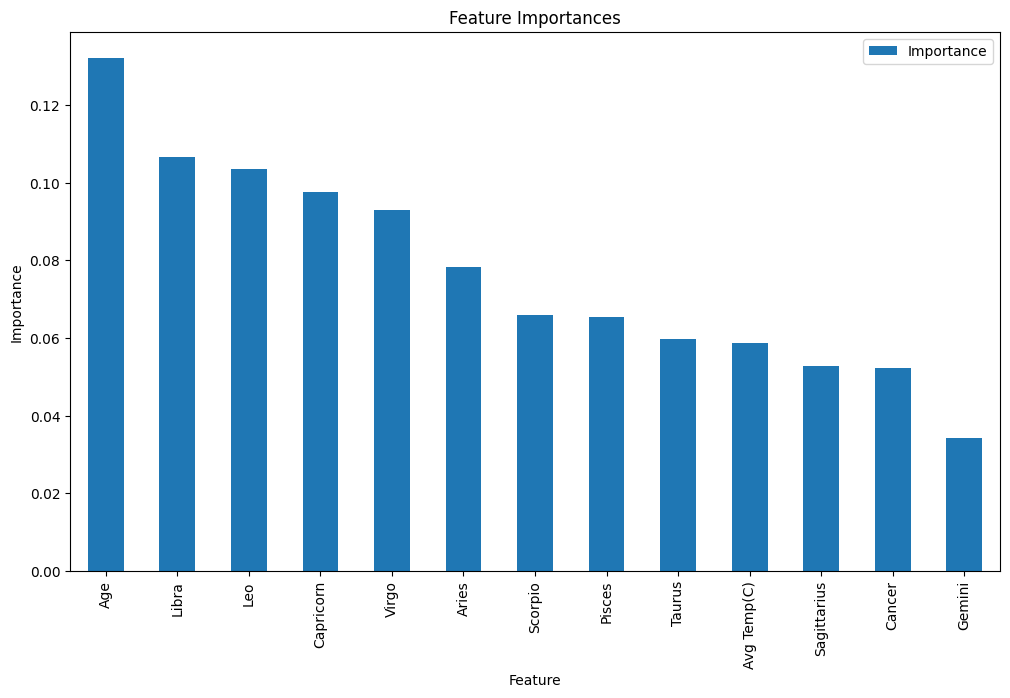

In [33]:
# Library Imports
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


# Data Generation for Non-Billionaires
num_samples = len(data)
np.random.seed(42)  # for reproducibility

names = ["Person_" + str(i) for i in range(num_samples)]
net_worths = np.random.uniform(0.1, 0.9, num_samples)
ages = np.random.randint(20, 91, num_samples)
sources = data['Source'].sample(num_samples, replace=True).values
countries = data['Country'].sample(num_samples, replace=True).values
suicidal_rates = [data[data['Country'] == country]['Suicidal Rate'].values[0] for country in countries]
avg_temps = [data[data['Country'] == country]['Avg Temp(C)'].values[0] for country in countries]
current_year = datetime.now().year
birthyears = current_year - ages
birthdates = [datetime(year, np.random.randint(1, 13), np.random.randint(1, 29)) for year in birthyears]
zodiacs = [get_zodiac(bd) for bd in birthdates]

non_billionaire_data = pd.DataFrame({
    "Rank": range(data['Rank'].max() + 1, data['Rank'].max() + num_samples + 1),
    "Name": names,
    "Net Worth": net_worths,
    "Age": ages,
    "Source": sources,
    "Country": countries,
    "Suicidal Rate": suicidal_rates,
    "Avg Temp(C)": avg_temps,
    "Birthdate": birthdates,
    "Zodiac": zodiacs
})

combined_data_balanced = pd.concat([data, non_billionaire_data], ignore_index=True)
combined_data_balanced['Billionaire'] = combined_data_balanced['Net Worth'].apply(lambda x: 1 if x >= 1 else 0)

# Data Preparation for CV (Using the 'Zodiac' feature)
X_balanced = combined_data_balanced[['Age', 'Source', 'Country', 'Suicidal Rate', 'Avg Temp(C)', 'Zodiac']]
y_balanced = combined_data_balanced['Billionaire']

# Transform features
X_selected = pd.concat([X_balanced[['Age', 'Avg Temp(C)']], pd.get_dummies(X_balanced['Zodiac'], drop_first=True)], axis=1)
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_selected)

# Initialize a 5-fold cross-validation generator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Perform cross-validation
cross_val_accuracies = cross_val_score(xgb_model, X_transformed, y_balanced, cv=kf, scoring='accuracy')
cross_val_auc = cross_val_score(xgb_model, X_transformed, y_balanced, cv=kf, scoring='roc_auc')

# Print the results
print("Cross-Validation Accuracies:", cross_val_accuracies)
print("Mean CV Accuracy:", np.mean(cross_val_accuracies))
print("Cross-Validation AUCs:", cross_val_auc)
print("Mean CV AUC:", np.mean(cross_val_auc))

#  Train the model on full data for feature importance and other post-training analysis
xgb_model.fit(X_transformed, y_balanced)

# Feature Importance Visualization
feature_importances = xgb_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
})
zodiac_importance = features_df[features_df['Feature'].str.contains('Zodiac')]
print(zodiac_importance)
features_df.sort_values(by='Importance', ascending=False).plot(x='Feature', y='Importance', kind='bar', figsize=(12, 7))
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()


Logistic Regression is a statistical method used for binary classification, which means it's primarily employed when the goal is to predict one of two possible outcomes. Despite its name, logistic regression is actually a classification algorithm, not a regression algorithm like linear regression.

In [34]:
# Library Imports
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming data and other necessary variables are already defined...

# Data Preparation for CV (Using the 'Zodiac' feature)
X_balanced = combined_data_balanced[['Age', 'Source', 'Country', 'Suicidal Rate', 'Avg Temp(C)', 'Zodiac']]
y_balanced = combined_data_balanced['Billionaire']

# Transform features
X_selected = pd.concat([X_balanced[['Age', 'Avg Temp(C)']], pd.get_dummies(X_balanced['Zodiac'], drop_first=True)], axis=1)
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_selected)

# Initialize a 5-fold cross-validation generator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model using BaggingClassifier with LogisticRegression as the base estimator
logistic_model = LogisticRegression(random_state=42, max_iter=5000)
ensemble_logistic = BaggingClassifier(base_estimator=logistic_model, n_estimators=50, random_state=42)

# Perform cross-validation
cross_val_accuracies = cross_val_score(ensemble_logistic, X_transformed, y_balanced, cv=kf, scoring='accuracy')
cross_val_auc = cross_val_score(ensemble_logistic, X_transformed, y_balanced, cv=kf, scoring='roc_auc')

# Print the results
print("Cross-Validation Accuracies:", cross_val_accuracies)
print("Mean CV Accuracy:", np.mean(cross_val_accuracies))
print("Cross-Validation AUCs:", cross_val_auc)
print("Mean CV AUC:", np.mean(cross_val_auc))




Cross-Validation Accuracies: [0.61676647 0.64371257 0.62275449 0.63963964 0.60660661]
Mean CV Accuracy: 0.6258959558360756
Cross-Validation AUCs: [0.68244385 0.67697687 0.67520274 0.67783114 0.64833491]
Mean CV AUC: 0.672157900373193
